Found 3228 images belonging to 4 classes.
Found 323 images belonging to 4 classes.


c:\Users\Maheen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5664 - loss: 1.0749 - val_accuracy: 0.7957 - val_loss: 0.4873
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8470 - loss: 0.4434 - val_accuracy: 0.8390 - val_loss: 0.4100
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8781 - loss: 0.3613 - val_accuracy: 0.8700 - val_loss: 0.3512
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8927 - loss: 0.3115 - val_accuracy: 0.8700 - val_loss: 0.3396
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9024 - loss: 0.2633 - val_accuracy: 0.8793 - val_loss: 0.3051


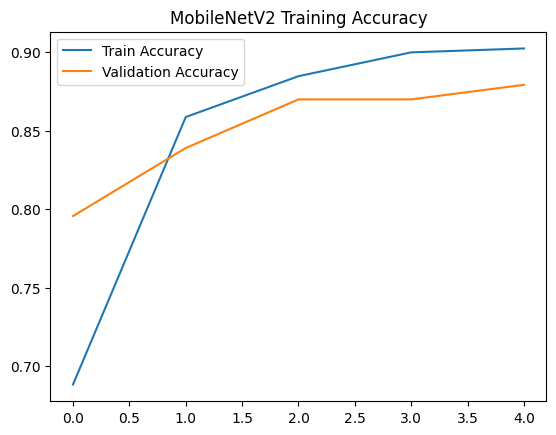

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

train_dir = "C:/Users/Maheen/Desktop/Processed Image/Train"
test_dir = "C:/Users/Maheen/Desktop/Processed Image/Test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False  


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=5, validation_data=test_data)

model.save("rose_disease_mobilenetv2.h5")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("MobileNetV2 Training Accuracy")
plt.show()


In [4]:
pip install gradio tensorflow numpy pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


model = tf.keras.models.load_model("C:/Users/Maheen/Desktop/rose disease detection model/rose_disease_mobilenetv2.h5")


class_labels = ["Black Spot", "Healthy Leaf", "Insect Hole", "Yellow Mosaic Virus"]


def preprocess_image(img):
    img = img.resize((224, 224)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array


def predict_disease(img):
    img_array = preprocess_image(img)
    prediction = model.predict(img_array)[0]
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return f"Disease: {predicted_class} (Confidence: {confidence:.2f}%)"


interface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(label="Prediction"),
    title="🌹 Rose Disease Detector",
    description="Upload a rose leaf image to detect disease using AI!",
)


interface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
